<a href="https://colab.research.google.com/github/bharadwaj-narayanam/IPL-data-analysis/blob/main/Final_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008.
Explore and analyze the data to discover results and statistics for different teams playing in IPL.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
teams = pd.read_csv("/content/drive/MyDrive/Almabetter Data/IPL Data/teams.csv")
matches = pd.read_csv("/content/drive/MyDrive/Almabetter Data/IPL Data/matches.csv",parse_dates=['date'])
teamwise_home_and_away = pd.read_csv('/content/drive/MyDrive/Almabetter Data/IPL Data/teamwise_home_and_away.csv')
mostRuns_avg_strikerate = pd.read_csv("/content/drive/MyDrive/Almabetter Data/IPL Data/most_runs_average_strikerate.csv")
deliveries = pd.read_csv("/content/drive/MyDrive/Almabetter Data/IPL Data/deliveries.csv")
players = pd.read_excel("/content/drive/MyDrive/Almabetter Data/IPL Data/Players.xlsx")

### Teams
Contain the names of all the teams.
### Matches
Details of all matches from 2017-2019
### teamwise_home_and_away
details of the team winning at home and away
### mostRuns_avg_strikerate
Details of batsman, total_runs, outs, number_of_balls, average, strikerate
### deliveries
Details of every ball delivered 
### Players
Player details

# At first we will make a visualization of no.of wins each team managed to secure every season

In [ ]:
dict_ = {}
for i in matches['date'].dt.year.unique():
  df = pd.DataFrame(matches[matches['date'].dt.year == i]['winner'].replace({'Mumbai Indians':"MI",
                                                                             'Rising Pune Supergiant':"RPS",
                                                                             'Rising Pune Supergiants':"RPS",
                                                                             'Kolkata Knight Riders':"KKR",
                                                                             'Sunrisers Hyderabad':"SRH",
                                                                             'Kings XI Punjab':"KXIP",
                                                                             'Delhi Daredevils':"DD",
                                                                             'Gujarat Lions':"GL",
                                                                             'Royal Challengers Bangalore':"RCB",
                                                                             'Chennai Super Kings':"CSK",
                                                                             'Rajasthan Royals':"RR",
                                                                             'Delhi Capitals':"DC",
                                                                             'Deccan Chargers': "DEC CH",
                                                                             'Kochi Tuskers Kerala':"KTK",
                                                                             'Pune Warriors':"PW"}).value_counts())
  dict_[i] = {}
  for k in df.index:
    if k not in list(dict_[i].keys()):
      dict_[i][k] = df.loc[k,'winner']

In [ ]:
# Converting the dictionary into a dataframe and filling those values with 0 in the season which the teams didn't play a single match
no_of_times_won = pd.DataFrame(dict_).fillna(0)

In [ ]:
no_of_times_won = no_of_times_won.T
no_of_times_won.sort_index(inplace=True)

Text(0, 0.5, 'No.of matches won')

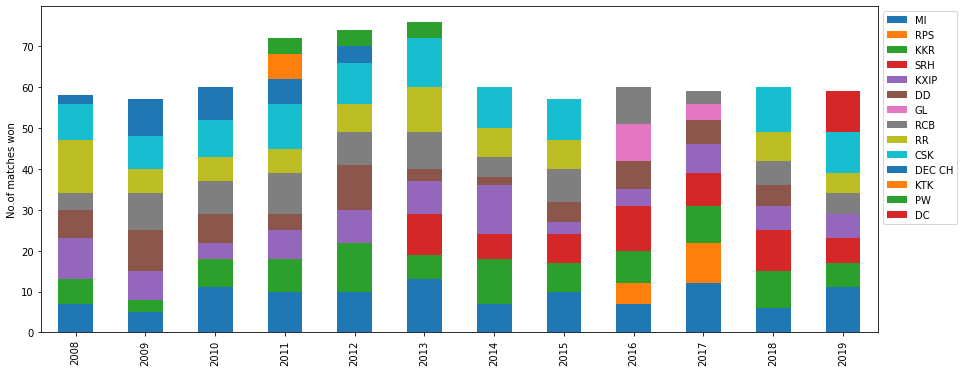

In [ ]:
# Stacked bar graph for all the teams across the seasons
no_of_times_won.plot(kind="bar", stacked=True, figsize = (15,6))
plt.legend(bbox_to_anchor = (1, 1))
plt.ylabel("No.of matches won")

Let us see what affect does winning the toss have on actual winning of the match

In [ ]:
matches['year'] = matches['date'].dt.year

In [ ]:
# creating a dictionary which consists of years as keys and the correlation of toss winning and actual winning as values
toss = {}
for i in matches['year'].unique():
  df = pd.DataFrame(matches[matches['date'].dt.year == i]['winner'].value_counts())
  df1 = pd.DataFrame(matches[matches['year']==i]['toss_winner'].value_counts())
  df['toss_winner'] = df1['toss_winner']
  toss[i] = df.corr().iloc[0,1]

In [ ]:
toss = pd.DataFrame([toss]).T
toss.rename({0:"Pearson Correlation"},axis=1,inplace=True)

In [ ]:
toss.sort_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


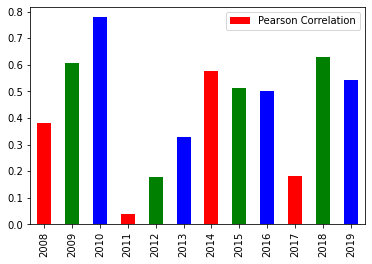

In [ ]:
my_colors = 'rgb'
toss.plot(kind='bar',color = my_colors)

In [ ]:

match=matches.copy()
Players=players.copy()
# deliveries=pd.read_csv(path+"deliveries.csv")
# teamwise_home_and_away=pd.read_csv(path+"teamwise_home_and_away.csv")
most_runs_average_strikerate=mostRuns_avg_strikerate.copy()



Winners dependency on who playerd first inning

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


In [ ]:
most_runs_average_strikerate.head(1)

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351


In [ ]:
teamwise_home_and_away.head(1)

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.5,62.5


In [ ]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


In [ ]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
match.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year
0,1,IPL-2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017


In [ ]:
match_id_with_no_result=list(match[match["result"]=="no result"].id)
match_id_with_no_result #matches having no team with win or loss

[301, 546, 571, 11340]

In [ ]:
match=match[~match["id"].isin(match_id_with_no_result)]
deliveries=deliveries[~deliveries["match_id"].isin(match_id_with_no_result)] #removing the deliveries of the match which have no result

In [ ]:
match[match["id"]==546] #test

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year


In [ ]:
def inning_finder(winner,toss_decision,toss_winner):
  """ function return in which inning  a team wins the match""" 
  innings_winner=0
  if toss_winner==winner and toss_decision=="field":
    innings_winner=2
  elif toss_winner==winner and toss_decision=="bat":
    innings_winner=1
  elif toss_winner!=winner and toss_decision=="bat":
    innings_winner=2
  elif toss_winner!=winner and toss_decision=="field":
    innings_winner=1
  return innings_winner
match["innings_winner"]=match.apply(lambda x: inning_finder(x["winner"],x["toss_decision"],x["toss_winner"]),
                                                                                axis=1)


In [ ]:
inning_wise_percentage=match[["team1","team2","innings_winner","winner"]].value_counts("innings_winner")/match.shape[0]
first_inning_percentage_win=inning_wise_percentage.iloc[0] # getting the percentage of matches in which  team who played jfirst inning won
# getting the percentage of matches in which  team who played jfirst inning won
second_inning_percentage_win=inning_wise_percentage.iloc[1]


In [ ]:
print(first_inning_percentage_win)
second_inning_percentage_win

0.5545212765957447


0.4454787234042553

Text(0.5, 1.0, 'Inning wise winning percentage')

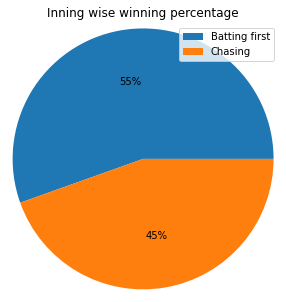

In [155]:
plt.pie([first_inning_percentage_win,second_inning_percentage_win],autopct='%1.0f%%',radius=1.2)
plt.legend(["Batting first","Chasing"])
plt.title("Inning wise winning percentage")

Winning dependency on extra runs given 

In [ ]:
#getting the number of extra runs given in every inning of each match
inning_wise_extra_runs=pd.DataFrame(deliveries.groupby(["match_id","inning"]).agg({"extra_runs":"sum"}))


In [ ]:
inning_wise_extra_runs.shape

(1522, 1)

In [ ]:
inning_wise_extra_runs=inning_wise_extra_runs.reset_index()

In [ ]:
#dropping the innings which is greater then  2 , it is in the case when the match goes ties 
inning_wise_extra_runs.drop(inning_wise_extra_runs[inning_wise_extra_runs["inning"]>2].index,inplace=True )

In [ ]:
inning_wise_extra_runs

,match_id,inning,extra_runs
0,1,1,7
1,1,2,6
2,2,1,8
3,2,2,4
4,3,1,4
...,...,...,...
1517,11413,2,5
1518,11414,1,8
1519,11414,2,11
1520,11415,1,3


In [ ]:
def inning_wise_wins(x,temp=match):
 """ function return the wins or loose of the match based on the index and the inning with the help of match dataframe which is set as default """
 if int(match.loc[match["id"]==x["match_id"]]["innings_winner"])==x["inning"]:
     return "wins"
 else:
     return "Loose"
inning_wise_extra_runs["win_Loose"]=inning_wise_extra_runs.apply(lambda x: inning_wise_wins(x),axis=1)

In [ ]:
inning_wise_extra_runs

,match_id,inning,extra_runs,win_Loose
0,1,1,7,wins
1,1,2,6,Loose
2,2,1,8,Loose
3,2,2,4,wins
4,3,1,4,Loose
...,...,...,...,...
1517,11413,2,5,wins
1518,11414,1,8,Loose
1519,11414,2,11,wins
1520,11415,1,3,wins


In [ ]:
inning_wise_extra_runs.reset_index(inplace=True)

In [ ]:
inning_wise_extra_runs.shape

(1504, 5)

In [ ]:
MoreXtrarunswins=0
lessXtrarunsLoose=0
independentxtraruns=0

""" code to count wins when extra runs is greater or lesser or equal"""
for i in range(0,inning_wise_extra_runs.shape[0],2):
   if (inning_wise_extra_runs.iloc[i]["extra_runs"]>inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i]["win_Loose"]=="wins":
     MoreXtrarunswins+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]<inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i+1]["win_Loose"]=="wins":
     MoreXtrarunswins+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]>inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i]["win_Loose"]=="Loose":
     lessXtrarunsLoose+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]<inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i+1]["win_Loose"]=="Loose":
     lessXtrarunsLoose+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]==inning_wise_extra_runs.iloc[i+1]["extra_runs"]):
      independentxtraruns+=1
print(MoreXtrarunswins)
print(lessXtrarunsLoose)
print(independentxtraruns)
   


353
335
64


In [ ]:
win_Count=(inning_wise_extra_runs.shape[0])//2
win_Count

752

In [ ]:
##counting wins percentage when xtra runs is greater
XtrarunsWinsPercentage=(MoreXtrarunswins/win_Count)*100
XtrarunsWinsPercentage

46.941489361702125

In [ ]:
XtrarunsLoosePercentage=(lessXtrarunsLoose/win_Count)*100 ##counting loose percentage when xtra runs is greater 
XtrarunsLoosePercentage

44.547872340425535

In [ ]:
##counting  percentage of matches having  xtra runs is equal
independentxtrarunspercentage=(independentxtraruns/win_Count)*100
independentxtrarunspercentage

8.51063829787234

Text(0.5, 1.0, 'Winning percentage based on extra runs')

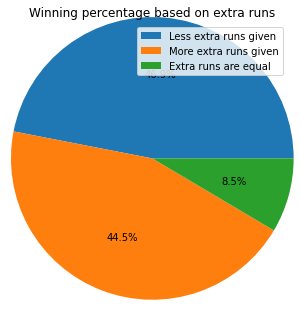

In [154]:

plt.pie([XtrarunsWinsPercentage,XtrarunsLoosePercentage,independentxtrarunspercentage],autopct='%1.01f%%',radius=1.3)
plt.legend(["Less extra runs given","More extra runs given","Extra runs are equal"],loc=1)
plt.title("Winning percentage based on extra runs")

Season Wise Trend of the runs given by the bowlers

In [ ]:
# getting number of runs given by each bowler
total_runs_bowler=pd.DataFrame(deliveries.groupby(["match_id","bowler"]).agg({"total_runs":"sum"}))
total_runs_bowler

total_runs
match_id bowler                    
1        A Choudhary             55
         A Nehra                 42
         B Kumar                 28
         BCJ Cutting             35
         Bipul Sharma             4
...                             ...
11415    MJ McClenaghan          26
         RA Jadeja               12
         RD Chahar               14
         SL Malinga              50
         SN Thakur               37

[8948 rows x 1 columns]

In [ ]:
total_runs_bowler.reset_index(inplace=True)

In [ ]:
total_runs_bowler

,match_id,bowler,total_runs
0,1,A Choudhary,55
1,1,A Nehra,42
2,1,B Kumar,28
3,1,BCJ Cutting,35
4,1,Bipul Sharma,4
...,...,...,...
8943,11415,MJ McClenaghan,26
8944,11415,RA Jadeja,12
8945,11415,RD Chahar,14
8946,11415,SL Malinga,50


In [ ]:
# merge match dataframe to get season name
total_runs_bowler=pd.merge(total_runs_bowler, match.loc[:,["id","Season"]], left_on='match_id', right_on='id', how='inner')
total_runs_bowler

,match_id,bowler,total_runs,id,Season
0,1,A Choudhary,55,1,IPL-2017
1,1,A Nehra,42,1,IPL-2017
2,1,B Kumar,28,1,IPL-2017
3,1,BCJ Cutting,35,1,IPL-2017
4,1,Bipul Sharma,4,1,IPL-2017
...,...,...,...,...,...
8943,11415,MJ McClenaghan,26,11415,IPL-2019
8944,11415,RA Jadeja,12,11415,IPL-2019
8945,11415,RD Chahar,14,11415,IPL-2019
8946,11415,SL Malinga,50,11415,IPL-2019


In [ ]:
total_runs_bowler.drop(["id"],axis=1,inplace=True)

In [ ]:
total_runs_bowler

,match_id,bowler,total_runs,Season
0,1,A Choudhary,55,IPL-2017
1,1,A Nehra,42,IPL-2017
2,1,B Kumar,28,IPL-2017
3,1,BCJ Cutting,35,IPL-2017
4,1,Bipul Sharma,4,IPL-2017
...,...,...,...,...
8943,11415,MJ McClenaghan,26,IPL-2019
8944,11415,RA Jadeja,12,IPL-2019
8945,11415,RD Chahar,14,IPL-2019
8946,11415,SL Malinga,50,IPL-2019


In [ ]:
Players.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [ ]:
# merge Player dataframe to get Bowler skill
total_runs_bowler=pd.merge(total_runs_bowler, Players.loc[:,["Player_Name","Bowling_Skill"]], left_on='bowler', right_on='Player_Name', how='inner')


In [ ]:
unique_Bowling_list=list(Players.Bowling_Skill.unique())
unique_Bowling_list

['Right-arm medium',
 'Right-arm offbreak',
 'Left-arm fast-medium',
 'Right-arm fast-medium',
 nan,
 'Right-arm fast',
 'Legbreak googly',
 'Legbreak',
 'Left-arm medium-fast',
 'Slow left-arm orthodox',
 'Right-arm medium-fast',
 'Left-arm medium',
 'Left-arm fast',
 'Slow left-arm chinaman',
 'Right-arm bowler',
 'Right-arm Medium',
 'Right-arm Fast']

In [ ]:
total_runs_bowler

,match_id,bowler,total_runs,Season,Player_Name,Bowling_Skill
0,1,A Choudhary,55,IPL-2017,A Choudhary,Left-arm fast-medium
1,30,A Choudhary,21,IPL-2017,A Choudhary,Left-arm fast-medium
2,37,A Choudhary,32,IPL-2017,A Choudhary,Left-arm fast-medium
3,42,A Choudhary,17,IPL-2017,A Choudhary,Left-arm fast-medium
4,45,A Choudhary,19,IPL-2017,A Choudhary,Left-arm fast-medium
...,...,...,...,...,...,...
8943,11344,O Thomas,13,IPL-2019,O Thomas,Right-arm fast
8944,11335,A Roy,14,IPL-2019,A Roy,Slow left-arm orthodox
8945,11338,S Warrier,31,IPL-2019,S Warrier,Right-arm fast-medium
8946,11343,S Warrier,31,IPL-2019,S Warrier,Right-arm fast-medium


In [ ]:
""" to classify them  from ['Right-arm medium','Right-arm offbreak',.. ] into two Broader categories pacer and spinner]"""
def classify(x):
  if "fast" in x or "medium" in x:
    return "Pacer"
  else:
     return "Spinner"
total_runs_bowler["Broader_classification"]=total_runs_bowler["Bowling_Skill"].apply(lambda x: classify(x))

In [ ]:
total_runs_bowler.drop("Bowling_Skill",inplace=True,axis=1)

In [ ]:
total_runs_bowler

,match_id,bowler,total_runs,Season,Player_Name,Broader_classification
0,1,A Choudhary,55,IPL-2017,A Choudhary,Pacer
1,30,A Choudhary,21,IPL-2017,A Choudhary,Pacer
2,37,A Choudhary,32,IPL-2017,A Choudhary,Pacer
3,42,A Choudhary,17,IPL-2017,A Choudhary,Pacer
4,45,A Choudhary,19,IPL-2017,A Choudhary,Pacer
...,...,...,...,...,...,...
8943,11344,O Thomas,13,IPL-2019,O Thomas,Pacer
8944,11335,A Roy,14,IPL-2019,A Roy,Spinner
8945,11338,S Warrier,31,IPL-2019,S Warrier,Pacer
8946,11343,S Warrier,31,IPL-2019,S Warrier,Pacer


In [ ]:
# total runs given by each category of bowler in every season 
total_runs_bowler=total_runs_bowler.groupby(["Season","Broader_classification"]).agg({"total_runs":"sum","Player_Name":"nunique"})

In [ ]:
# getting average runs given by  every Player
total_runs_bowler["average_runs_given"]=total_runs_bowler["total_runs"]/total_runs_bowler["Player_Name"]

In [ ]:
total_runs_bowler.reset_index(inplace=True)
total_runs_bowler

,Season,Broader_classification,total_runs,Player_Name,average_runs_given
0,IPL-2008,Pacer,13662,62,220.354839
1,IPL-2008,Spinner,4275,36,118.750000
2,IPL-2009,Pacer,10223,71,143.985915
3,IPL-2009,Spinner,6130,41,149.512195
4,IPL-2010,Pacer,12119,76,159.460526
5,IPL-2010,Spinner,6764,47,143.914894
6,IPL-2011,Pacer,13466,77,174.883117
7,IPL-2011,Spinner,7632,55,138.763636
8,IPL-2012,Pacer,14570,77,189.220779
9,IPL-2012,Spinner,7883,52,151.596154


In [ ]:
df = total_runs_bowler.pivot(index='Season', columns='Broader_classification', values='average_runs_given')
df.replace(np.NaN,0,inplace=True)
df

Broader_classification,Pacer,Spinner
Season,,
IPL-2008,220.354839,118.750000
IPL-2009,143.985915,149.512195
IPL-2010,159.460526,143.914894
IPL-2011,174.883117,138.763636
IPL-2012,189.220779,151.596154
IPL-2013,201.097561,122.240000
IPL-2014,188.380952,185.868421
IPL-2015,194.483871,164.055556
IPL-2016,196.435484,148.511111


([<matplotlib.axis.YTick at 0x7ff9d6da28d0>,
 <a list of 5 Text major ticklabel objects>)

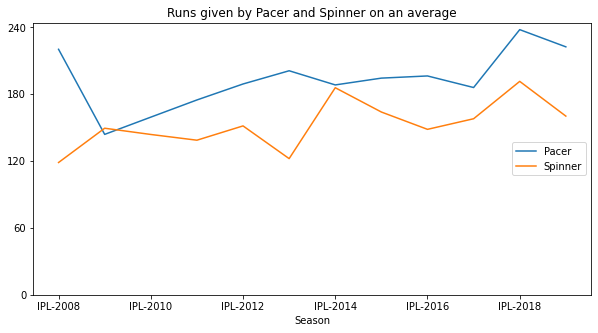

In [ ]:

df.plot(figsize=(10,5))
plt.legend(loc='right')
plt.title("Runs given by Pacer and Spinner on an average")
plt.yticks([round(i,1) for i in np.linspace(0,240,5)])

Season Wise Trend of the runs Scored By Batsman

In [ ]:
Players.Batting_Hand.unique()

array(['Right_Hand', 'Right_hand', 'Left_Hand', nan], dtype=object)

In [ ]:
df

Broader_classification,Pacer,Spinner
Season,,
IPL-2008,220.354839,118.750000
IPL-2009,143.985915,149.512195
IPL-2010,159.460526,143.914894
IPL-2011,174.883117,138.763636
IPL-2012,189.220779,151.596154
IPL-2013,201.097561,122.240000
IPL-2014,188.380952,185.868421
IPL-2015,194.483871,164.055556
IPL-2016,196.435484,148.511111


In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
#getting the runs scored by each batsman in every match
total_runs_batsman=pd.DataFrame(deliveries.groupby(["match_id","batsman"]).agg({"batsman_runs":"sum"}))
total_runs_batsman

batsman_runs
match_id batsman                  
1        A Choudhary             6
         BCJ Cutting            16
         CH Gayle               32
         DA Warner              14
         DJ Hooda               16
...                            ...
11415    RD Chahar               0
         RG Sharma              15
         SK Raina                9
         SN Thakur               2
         SR Watson              84

[11262 rows x 1 columns]

In [ ]:
total_runs_batsman.reset_index(inplace=True)
total_runs_batsman

,match_id,batsman,batsman_runs
0,1,A Choudhary,6
1,1,BCJ Cutting,16
2,1,CH Gayle,32
3,1,DA Warner,14
4,1,DJ Hooda,16
...,...,...,...
11257,11415,RD Chahar,0
11258,11415,RG Sharma,15
11259,11415,SK Raina,9
11260,11415,SN Thakur,2


In [ ]:
#Merge with match dataframe to get season name
total_runs_batsman=pd.merge(total_runs_batsman, match.loc[:,["id","Season"]], left_on='match_id', right_on='id', how='inner')
total_runs_batsman

,match_id,batsman,batsman_runs,id,Season
0,1,A Choudhary,6,1,IPL-2017
1,1,BCJ Cutting,16,1,IPL-2017
2,1,CH Gayle,32,1,IPL-2017
3,1,DA Warner,14,1,IPL-2017
4,1,DJ Hooda,16,1,IPL-2017
...,...,...,...,...,...
11257,11415,RD Chahar,0,11415,IPL-2019
11258,11415,RG Sharma,15,11415,IPL-2019
11259,11415,SK Raina,9,11415,IPL-2019
11260,11415,SN Thakur,2,11415,IPL-2019


In [ ]:
# merge with player dataframe to get Batting Hand
total_runs_batsman=pd.merge(total_runs_batsman, Players.loc[:,["Player_Name","Batting_Hand"]], left_on='batsman', right_on='Player_Name', how='inner')
total_runs_batsman

,match_id,batsman,batsman_runs,id,Season,Player_Name,Batting_Hand
0,1,A Choudhary,6,1,IPL-2017,A Choudhary,Right_hand
1,30,A Choudhary,15,30,IPL-2017,A Choudhary,Right_hand
2,42,A Choudhary,4,42,IPL-2017,A Choudhary,Right_hand
3,1,BCJ Cutting,16,1,IPL-2017,BCJ Cutting,Right_Hand
4,10,BCJ Cutting,20,10,IPL-2017,BCJ Cutting,Right_Hand
...,...,...,...,...,...,...,...
11257,11344,S Rutherford,12,11344,IPL-2019,S Rutherford,Left_Hand
11258,11413,S Rutherford,9,11413,IPL-2019,S Rutherford,Left_Hand
11259,11414,S Rutherford,14,11414,IPL-2019,S Rutherford,Left_Hand
11260,11329,P Raj,0,11329,IPL-2019,P Raj,Right_Hand


In [ ]:
# change the name of Batting Hand from 'Right_hand' to 'Right_Hand'
print(total_runs_batsman.Batting_Hand.unique())

total_runs_batsman.loc[total_runs_batsman["Batting_Hand"]=="Right_hand","Batting_Hand"]="Right_Hand"
total_runs_batsman


['Right_hand' 'Right_Hand' 'Left_Hand']


,match_id,batsman,batsman_runs,id,Season,Player_Name,Batting_Hand
0,1,A Choudhary,6,1,IPL-2017,A Choudhary,Right_Hand
1,30,A Choudhary,15,30,IPL-2017,A Choudhary,Right_Hand
2,42,A Choudhary,4,42,IPL-2017,A Choudhary,Right_Hand
3,1,BCJ Cutting,16,1,IPL-2017,BCJ Cutting,Right_Hand
4,10,BCJ Cutting,20,10,IPL-2017,BCJ Cutting,Right_Hand
...,...,...,...,...,...,...,...
11257,11344,S Rutherford,12,11344,IPL-2019,S Rutherford,Left_Hand
11258,11413,S Rutherford,9,11413,IPL-2019,S Rutherford,Left_Hand
11259,11414,S Rutherford,14,11414,IPL-2019,S Rutherford,Left_Hand
11260,11329,P Raj,0,11329,IPL-2019,P Raj,Right_Hand


In [ ]:
total_runs_batsman[total_runs_batsman["Season"]=="IPL-2008"]["Player_Name"].unique().shape

(154,)

In [ ]:
#getting total runs by each type of batsman in every season
total_runs_batsman=total_runs_batsman.groupby(["Season","Batting_Hand"]).agg({"batsman_runs":"sum","Player_Name":"nunique"})


In [ ]:
# renaming column name
total_runs_batsman.rename(columns={"Player_Name":"CountOfBattingHand"},inplace=True)

In [ ]:
Players.size

2830

In [ ]:
total_runs_batsman.reset_index(inplace=True)

In [ ]:
total_runs_batsman

,Season,Batting_Hand,batsman_runs,CountOfBattingHand
0,IPL-2008,Left_Hand,6980,41
1,IPL-2008,Right_Hand,9829,113
2,IPL-2009,Left_Hand,5636,39
3,IPL-2009,Right_Hand,9740,111
4,IPL-2010,Left_Hand,5669,43
5,IPL-2010,Right_Hand,12085,121
6,IPL-2011,Left_Hand,6962,51
7,IPL-2011,Right_Hand,12915,129
8,IPL-2012,Left_Hand,6388,47
9,IPL-2012,Right_Hand,14934,123


In [ ]:
#getting the average for runs scored by each type of batsman in every season 
total_runs_batsman["Average_runs"]=total_runs_batsman["batsman_runs"]/total_runs_batsman["CountOfBattingHand"]

In [ ]:
total_runs_batsman

,Season,Batting_Hand,batsman_runs,CountOfBattingHand,Average_runs
0,IPL-2008,Left_Hand,6980,41,170.243902
1,IPL-2008,Right_Hand,9829,113,86.982301
2,IPL-2009,Left_Hand,5636,39,144.512821
3,IPL-2009,Right_Hand,9740,111,87.747748
4,IPL-2010,Left_Hand,5669,43,131.837209
5,IPL-2010,Right_Hand,12085,121,99.876033
6,IPL-2011,Left_Hand,6962,51,136.509804
7,IPL-2011,Right_Hand,12915,129,100.116279
8,IPL-2012,Left_Hand,6388,47,135.914894
9,IPL-2012,Right_Hand,14934,123,121.414634


In [ ]:
total_runs_batsman[total_runs_batsman["Season"]=="IPL-2008"]

,Season,Batting_Hand,batsman_runs,CountOfBattingHand,Average_runs
0,IPL-2008,Left_Hand,6980,41,170.243902
1,IPL-2008,Right_Hand,9829,113,86.982301


In [ ]:
df = total_runs_batsman.pivot(index='Season', columns='Batting_Hand', values='Average_runs')
df.replace(np.NaN,0,inplace=True)
df

Batting_Hand,Left_Hand,Right_Hand
Season,,
IPL-2008,170.243902,86.982301
IPL-2009,144.512821,87.747748
IPL-2010,131.837209,99.876033
IPL-2011,136.509804,100.116279
IPL-2012,135.914894,121.414634
IPL-2013,159.452381,113.769231
IPL-2014,138.918919,133.364583
IPL-2015,132.513514,132.141304
IPL-2016,151.410256,124.309278


([<matplotlib.axis.YTick at 0x7ff9d6cc2410>,
 <a list of 10 Text major ticklabel objects>)

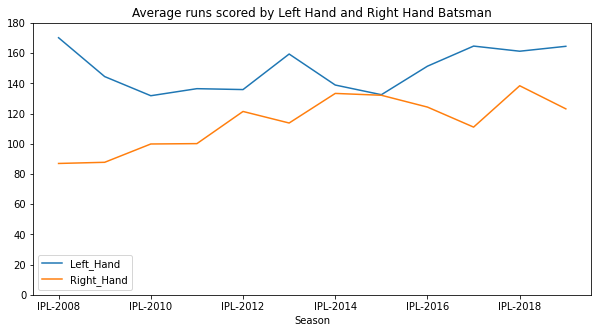

In [ ]:

df.plot(figsize=(10,5))
plt.legend()
plt.title("Average runs scored by Left Hand and Right Hand Batsman")
plt.yticks([round(i,1) for i in np.linspace(0,180,10)])

Season Wise trend for the wickets taken by Pacer and Spinners

In [ ]:
deliveries[deliveries["match_id"]==1].groupby(["match_id","bowler"]).agg({"dismissal_kind":"count"})

dismissal_kind
match_id bowler                      
1        A Choudhary                1
         A Nehra                    2
         B Kumar                    2
         BCJ Cutting                1
         Bipul Sharma               1
         DJ Hooda                   1
         MC Henriques               1
         Rashid Khan                2
         S Aravind                  0
         SR Watson                  0
         STR Binny                  1
         TM Head                    0
         TS Mills                   1
         YS Chahal                  1

In [ ]:
#number of player dismissed by every bowler in each match in every season 

Player_dismissed_by_bowler=deliveries.groupby(["match_id","bowler"]).agg({"player_dismissed":"count"})
Player_dismissed_by_bowler.reset_index(inplace=True)

In [ ]:
# merge two dataframe to get season 
Player_dismissed_by_bowler=pd.merge(Player_dismissed_by_bowler, match.loc[:,["id","Season"]], left_on='match_id', right_on='id', how='inner')
Player_dismissed_by_bowler


,match_id,bowler,player_dismissed,id,Season
0,1,A Choudhary,1,1,IPL-2017
1,1,A Nehra,2,1,IPL-2017
2,1,B Kumar,2,1,IPL-2017
3,1,BCJ Cutting,1,1,IPL-2017
4,1,Bipul Sharma,1,1,IPL-2017
...,...,...,...,...,...
8943,11415,MJ McClenaghan,0,11415,IPL-2019
8944,11415,RA Jadeja,0,11415,IPL-2019
8945,11415,RD Chahar,1,11415,IPL-2019
8946,11415,SL Malinga,2,11415,IPL-2019


In [ ]:
# merege players dataframe to get its skill
Player_dismissed_by_bowler=pd.merge(Player_dismissed_by_bowler, Players.loc[:,["Player_Name","Bowling_Skill"]], left_on='bowler', right_on='Player_Name', how='inner')


In [ ]:
Player_dismissed_by_bowler

,match_id,bowler,player_dismissed,id,Season,Player_Name,Bowling_Skill
0,1,A Choudhary,1,1,IPL-2017,A Choudhary,Left-arm fast-medium
1,30,A Choudhary,0,30,IPL-2017,A Choudhary,Left-arm fast-medium
2,37,A Choudhary,1,37,IPL-2017,A Choudhary,Left-arm fast-medium
3,42,A Choudhary,2,42,IPL-2017,A Choudhary,Left-arm fast-medium
4,45,A Choudhary,1,45,IPL-2017,A Choudhary,Left-arm fast-medium
...,...,...,...,...,...,...,...
8943,11344,O Thomas,0,11344,IPL-2019,O Thomas,Right-arm fast
8944,11335,A Roy,1,11335,IPL-2019,A Roy,Slow left-arm orthodox
8945,11338,S Warrier,0,11338,IPL-2019,S Warrier,Right-arm fast-medium
8946,11343,S Warrier,2,11343,IPL-2019,S Warrier,Right-arm fast-medium


In [ ]:
# from different kinds of classifcation , turn them into two Broader classification Spinner and Pacer
def classify(x):
  if "fast" in x or "medium" in x:
    return "Pacer"
  else:
     return "Spinner"
Player_dismissed_by_bowler["Broader_classification"]=Player_dismissed_by_bowler["Bowling_Skill"].apply(lambda x: classify(x))

In [ ]:
Player_dismissed_by_bowler

,match_id,bowler,player_dismissed,id,Season,Player_Name,Bowling_Skill,Broader_classification
0,1,A Choudhary,1,1,IPL-2017,A Choudhary,Left-arm fast-medium,Pacer
1,30,A Choudhary,0,30,IPL-2017,A Choudhary,Left-arm fast-medium,Pacer
2,37,A Choudhary,1,37,IPL-2017,A Choudhary,Left-arm fast-medium,Pacer
3,42,A Choudhary,2,42,IPL-2017,A Choudhary,Left-arm fast-medium,Pacer
4,45,A Choudhary,1,45,IPL-2017,A Choudhary,Left-arm fast-medium,Pacer
...,...,...,...,...,...,...,...,...
8943,11344,O Thomas,0,11344,IPL-2019,O Thomas,Right-arm fast,Pacer
8944,11335,A Roy,1,11335,IPL-2019,A Roy,Slow left-arm orthodox,Spinner
8945,11338,S Warrier,0,11338,IPL-2019,S Warrier,Right-arm fast-medium,Pacer
8946,11343,S Warrier,2,11343,IPL-2019,S Warrier,Right-arm fast-medium,Pacer


In [ ]:
#getting the number of player dismissed for each classification Broader and Spinner with Count of those players
Player_dismissed_by_bowler=Player_dismissed_by_bowler.groupby(["Season","Broader_classification"]).agg({"player_dismissed":"sum","Player_Name":"nunique"})

In [ ]:
Player_dismissed_by_bowler

player_dismissed  Player_Name
Season   Broader_classification                               
IPL-2008 Pacer                                541           62
         Spinner                              149           36
IPL-2009 Pacer                                437           71
         Spinner                              261           41
IPL-2010 Pacer                                463           76
         Spinner                              262           47
IPL-2011 Pacer                                516           77
         Spinner                              294           55
IPL-2012 Pacer                                586           77
         Spinner                              272           52
IPL-2013 Pacer                                663           82
         Spinner                              249           50
IPL-2014 Pacer                                423           63
         Spinner                              251           38
IPL-2015 Pacer                                468           62
         Spinner                              211           36
IPL-2016 Pacer                                458           62
         Spinner                              208           45
IPL-2017 Pacer                                479           67
         Spinner                              232           40
IPL-2018 Pacer                                435           54
         Spinner                              284           41
IPL-2019 Pacer                                400           56
         Spinner                              269           48

In [ ]:
Player_dismissed_by_bowler.reset_index(inplace=True)
Player_dismissed_by_bowler

,Season,Broader_classification,player_dismissed,Player_Name
0,IPL-2008,Pacer,541,62
1,IPL-2008,Spinner,149,36
2,IPL-2009,Pacer,437,71
3,IPL-2009,Spinner,261,41
4,IPL-2010,Pacer,463,76
5,IPL-2010,Spinner,262,47
6,IPL-2011,Pacer,516,77
7,IPL-2011,Spinner,294,55
8,IPL-2012,Pacer,586,77
9,IPL-2012,Spinner,272,52


In [ ]:
# getting the on an average how many  player  gets dismissed in each season with respect to Pacer and Spinner
Player_dismissed_by_bowler["Average_Player_dismissed"]=Player_dismissed_by_bowler["player_dismissed"]/Player_dismissed_by_bowler["Player_Name"]

In [ ]:
Player_dismissed_by_bowler

,Season,Broader_classification,player_dismissed,Player_Name,Average_Player_dismissed
0,IPL-2008,Pacer,541,62,8.725806
1,IPL-2008,Spinner,149,36,4.138889
2,IPL-2009,Pacer,437,71,6.154930
3,IPL-2009,Spinner,261,41,6.365854
4,IPL-2010,Pacer,463,76,6.092105
5,IPL-2010,Spinner,262,47,5.574468
6,IPL-2011,Pacer,516,77,6.701299
7,IPL-2011,Spinner,294,55,5.345455
8,IPL-2012,Pacer,586,77,7.610390
9,IPL-2012,Spinner,272,52,5.230769


In [ ]:
df = Player_dismissed_by_bowler.pivot(index='Season', columns='Broader_classification', values='Average_Player_dismissed')
df.replace(np.NaN,0,inplace=True)
df

Broader_classification,Pacer,Spinner
Season,,
IPL-2008,8.725806,4.138889
IPL-2009,6.154930,6.365854
IPL-2010,6.092105,5.574468
IPL-2011,6.701299,5.345455
IPL-2012,7.610390,5.230769
IPL-2013,8.085366,4.980000
IPL-2014,6.714286,6.605263
IPL-2015,7.548387,5.861111
IPL-2016,7.387097,4.622222


([<matplotlib.axis.YTick at 0x7ff9d6c5c850>,
 <a list of 12 Text major ticklabel objects>)

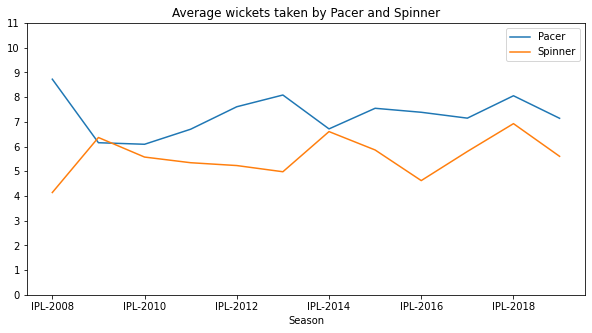

In [ ]:
df.plot(figsize=(10,5))
plt.legend()
plt.title("Average wickets taken by Pacer and Spinner")
plt.yticks([round(i,1) for i in np.linspace(0,11,12)])

In [ ]:
delievery_csv=deliveries.copy()
matches_csv=matches.copy()
mostrun_average_strikerate=mostRuns_avg_strikerate.copy()
team_csv=teams.copy()

Getting Top 5-Runs Scorer for each IPL Season  

In [ ]:
# merged delievery and matches for getting particular season 
def most_runs_scored(x):
  merging_delievery_matches=pd.merge(delievery_csv,matches_csv,how="inner", left_on=["match_id"],right_on=["id"])
  #filtering specific for the particular season and evaluation total runs scored by each batsman
  player_team=merging_delievery_matches[["batsman","batting_team"]][merging_delievery_matches["Season"]==x]
  merge_particular_season=merging_delievery_matches[merging_delievery_matches["Season"]==x]
  return(merge_particular_season.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False))[:5]

l=["IPL-2008","IPL-2009","IPL-2010","IPL-2011","IPL-2012","IPL-2013","IPL-2014","IPL-2015","IPL-2016","IPL-2017","IPL-2018","IPL-2019"]
for i in l:
  print(f'The most runs scorer in {i} are : {most_runs_scored(i)}')
  

#('Mumbai Indians', 'Kochi Tuskers Kerala', 'Gujarat Lions', 'Delhi Daredevils', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Kolkata Knight Riders', 'Delhi Capitals', 'Pune Warriors', 'Deccan Chargers', 'Rising Pune Supergiant', 'Royal Challengers Bangalore')

The most runs scorer in IPL-2008 are : batsman
SE Marsh         616
G Gambhir        534
ST Jayasuriya    514
SR Watson        472
GC Smith         441
Name: batsman_runs, dtype: int64
The most runs scorer in IPL-2009 are : batsman
ML Hayden         572
AC Gilchrist      495
AB de Villiers    465
SK Raina          434
TM Dilshan        418
Name: batsman_runs, dtype: int64
The most runs scorer in IPL-2010 are : batsman
SR Tendulkar    618
JH Kallis       572
SK Raina        528
SC Ganguly      493
M Vijay         458
Name: batsman_runs, dtype: int64
The most runs scorer in IPL-2011 are : batsman
CH Gayle        608
V Kohli         557
SR Tendulkar    553
SE Marsh        504
MEK Hussey      492
Name: batsman_runs, dtype: int64
The most runs scorer in IPL-2012 are : batsman
CH Gayle     733
G Gambhir    590
S Dhawan     569
AM Rahane    560
V Sehwag     495
Name: batsman_runs, dtype: int64
The most runs scorer in IPL-2013 are : batsman
MEK Hussey    733
CH Gayle      720
V Kohli       639

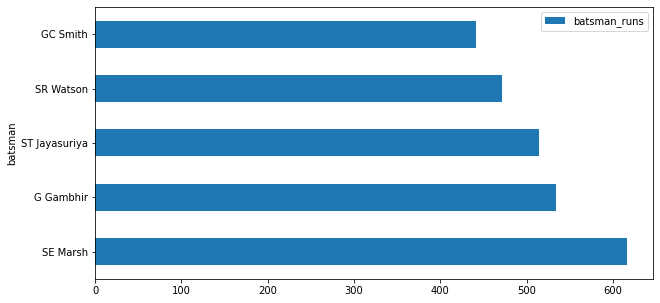

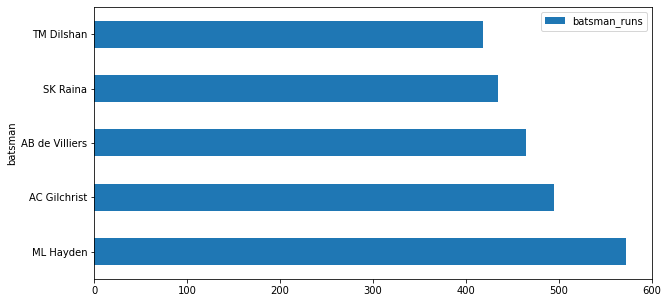

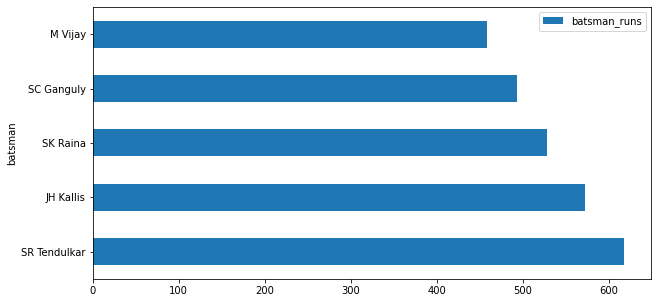

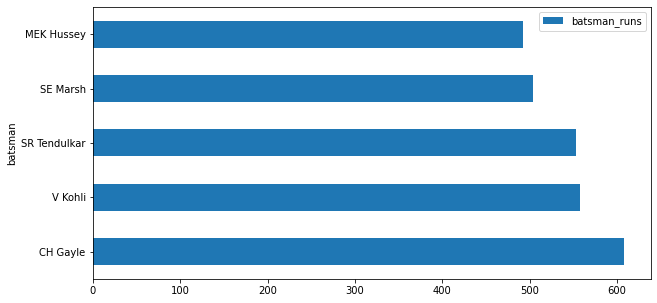

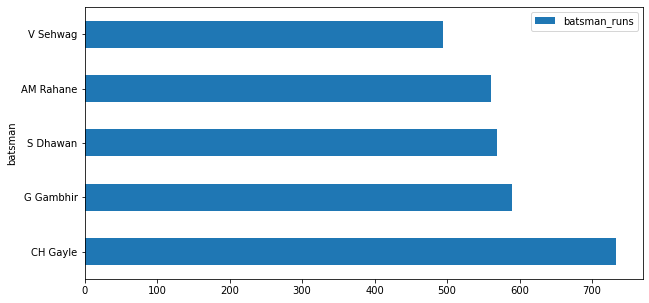

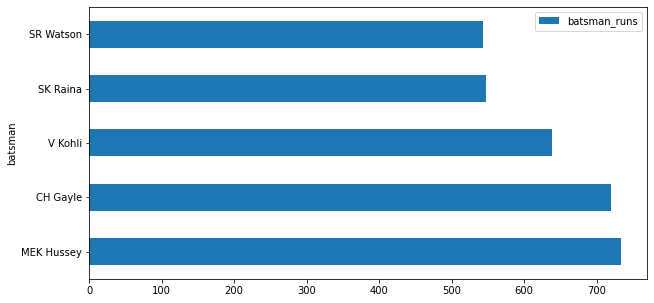

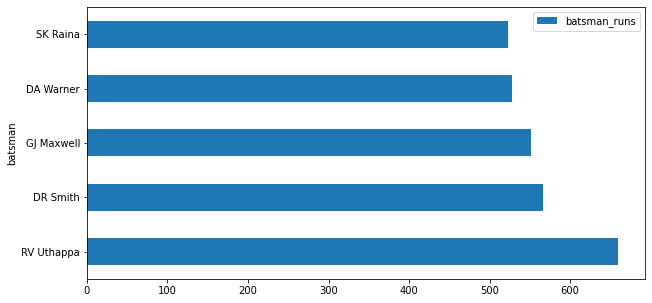

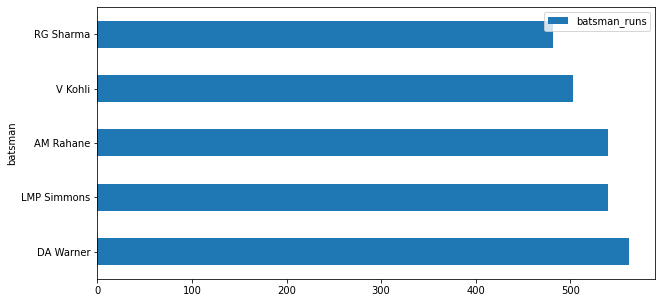

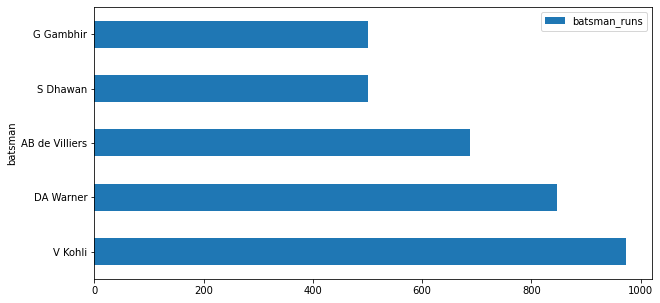

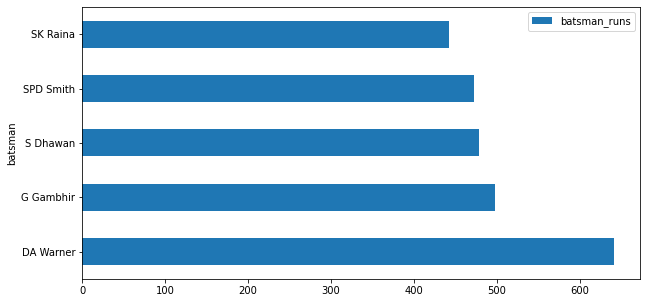

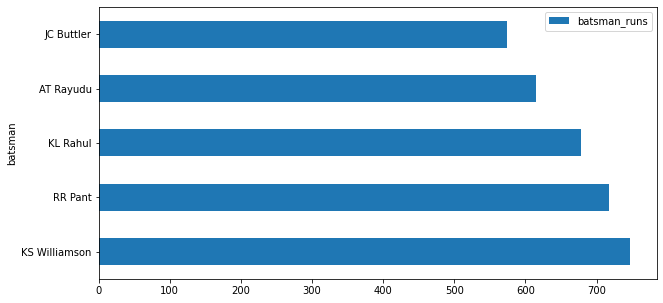

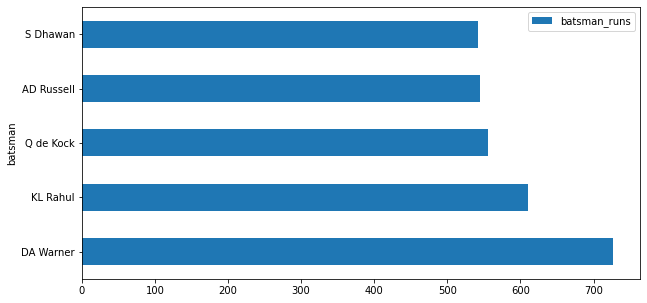

In [ ]:
# Bar chart for top 5-scorer for each season 
import matplotlib.pyplot as plt
for i in l: 
  plt.rcParams["figure.figsize"] = (10,5)
  from matplotlib.ticker import StrMethodFormatter
  pd.DataFrame(most_runs_scored(i)).plot(kind="barh")


Evaluating winning percentages for each team and each season
where x argument is for season and y argument for team 
  

In [ ]:
def winning_percentage(x,y):
  try:
    total_matches=len(matches_csv[((matches_csv["team1"]==y) | (matches_csv["team2"]==y)) & (matches_csv["Season"]==x)])
    # now matches winned by sunrises hyderabad for evaluating winning percentage

    total_winned_matches=len(matches_csv[(matches_csv["Season"]==x) & (matches_csv["winner"]==y) ])

    return((total_winned_matches/total_matches)*100)
  except:
    print(f'{y} is not present in {x} ')

     # where x is the season and y is the team in that season
winning_percentage(x="IPL-2008",y="Rajasthan Royals")


81.25

Getting Top 5-Wicket taking bowler
 for each IPL Season

In [ ]:
def most_wicketer(x):
  merging_delievery_matches=pd.merge(delievery_csv,matches_csv,how="inner", left_on=["match_id"],right_on=["id"])
  #filtering specific for the particular season and evaluation total runs scored by each batsman
  merge_particular_season=merging_delievery_matches[merging_delievery_matches["Season"]==x]
  wickets=merge_particular_season[(merge_particular_season["dismissal_kind"]=="caught") | (merge_particular_season["dismissal_kind"]=="bowled") | (merge_particular_season["dismissal_kind"]=="bowled") | (merge_particular_season["dismissal_kind"]=="lbw") | (merge_particular_season["dismissal_kind"]=="stumped") | (merge_particular_season["dismissal_kind"]=="caught and bowled") | (merge_particular_season["dismissal_kind"]=="hit wicket")]
  return(wickets.groupby("bowler")["bowler"].count().sort_values(ascending=False)[:5])  
for i in l:
  print(f'The most wicket taking  bowlers {i} are : {(most_wicketer(i))}')
  

 

The most wicket taking  bowlers IPL-2008 are : bowler
Sohail Tanvir    22
S Sreesanth      19
SK Warne         19
SR Watson        17
JA Morkel        17
Name: bowler, dtype: int64
The most wicket taking  bowlers IPL-2009 are : bowler
RP Singh      23
A Kumble      21
A Nehra       19
SL Malinga    18
PP Ojha       18
Name: bowler, dtype: int64
The most wicket taking  bowlers IPL-2010 are : bowler
PP Ojha            21
A Kumble           17
A Mishra           17
Harbhajan Singh    17
M Muralitharan     16
Name: bowler, dtype: int64
The most wicket taking  bowlers IPL-2011 are : bowler
SL Malinga    28
MM Patel      22
S Aravind     21
R Ashwin      20
A Mishra      19
Name: bowler, dtype: int64
The most wicket taking  bowlers IPL-2012 are : bowler
M Morkel         25
SP Narine        24
SL Malinga       22
UT Yadav         19
R Vinay Kumar    19
Name: bowler, dtype: int64
The most wicket taking  bowlers IPL-2013 are : bowler
DJ Bravo           32
JP Faulkner        28
MG Johnson       

Bar Plot of top 5- most wicket takers of each season

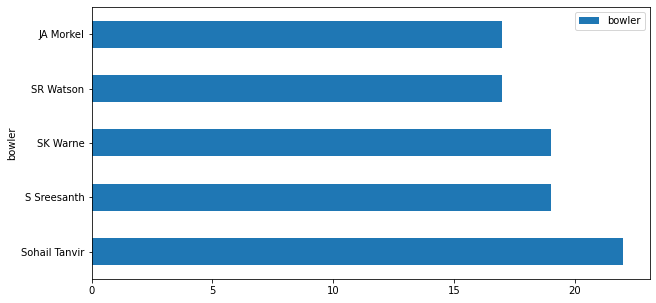

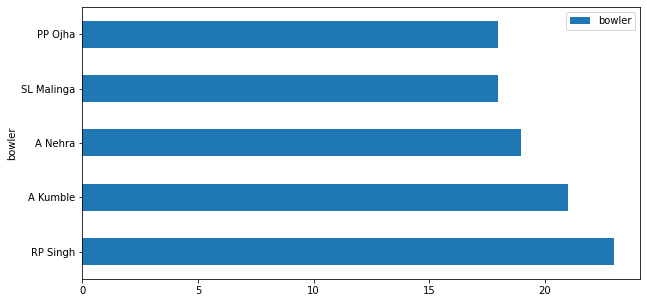

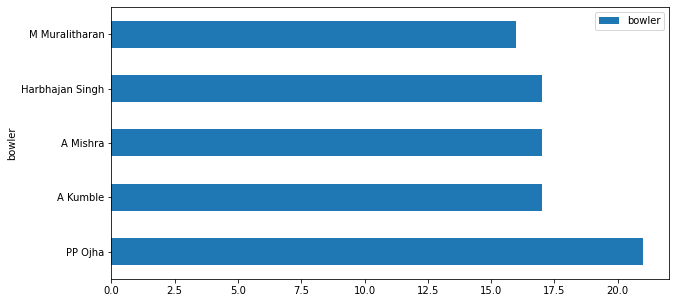

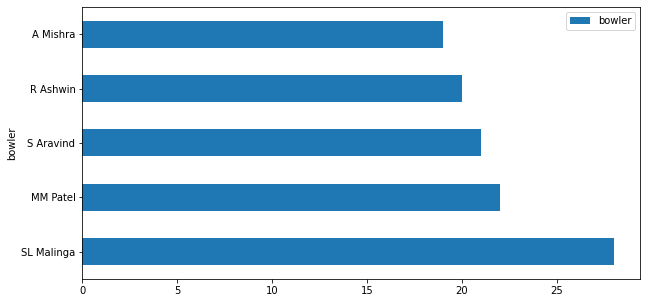

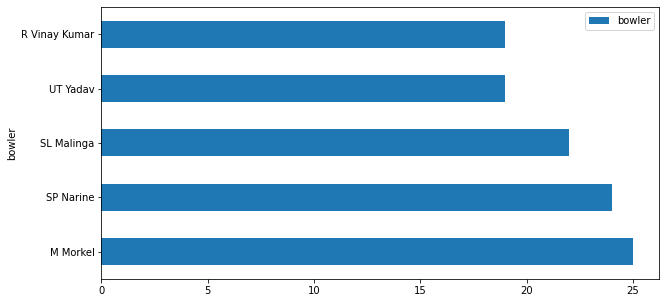

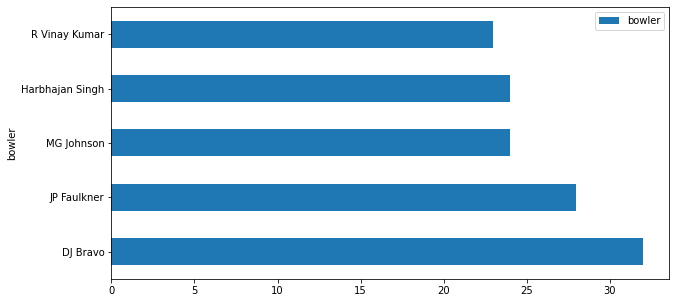

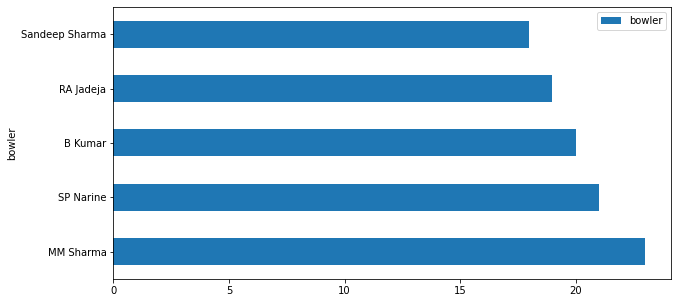

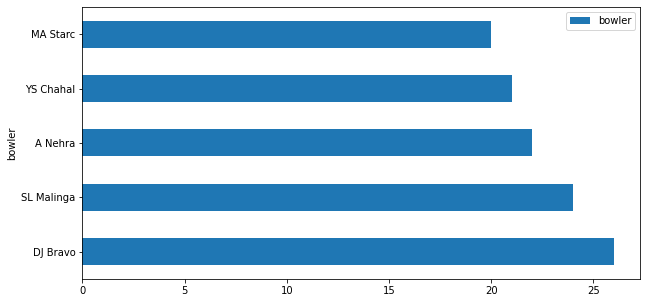

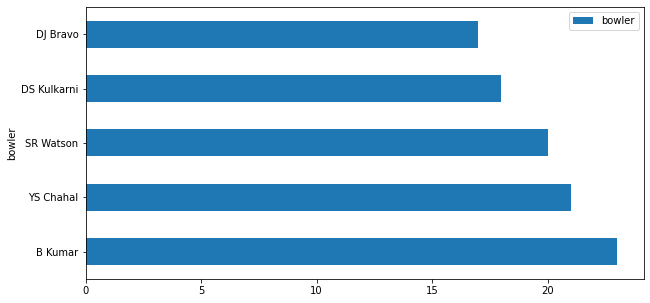

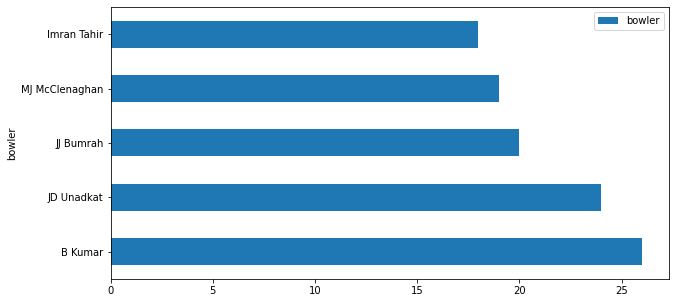

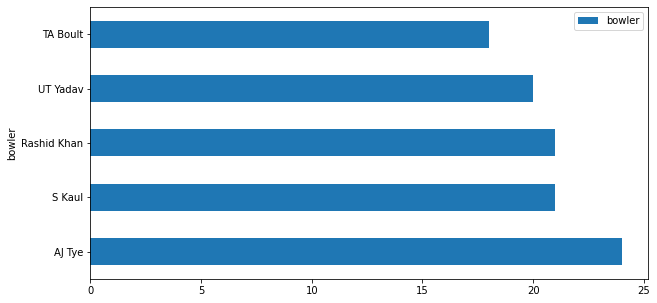

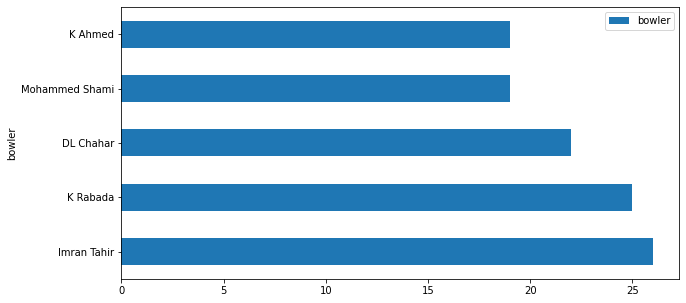

In [ ]:
for i in l:
  import matplotlib.pyplot as plt
  from matplotlib.ticker import StrMethodFormatter
  plt.rcParams["figure.figsize"] = (10,5)
  pd.DataFrame(most_wicketer(i)).plot(kind="barh")


Top runs scorer for each match where x is the IPL season and y is Match_Id

In [ ]:
def most_runs_scored_each_match(x,y):
  try:
    merging_delievery_matches=pd.merge(delievery_csv,matches_csv,how="inner", left_on=["match_id"],right_on=["id"])
    #filtering specific for the particular season and evaluation total runs scored by each batsman
    merge_particular_season=merging_delievery_matches[(merging_delievery_matches["Season"]==x) & (merging_delievery_matches["match_id"]==y)]
    player_team=merging_delievery_matches[["batsman","batting_team"]][merging_delievery_matches["Season"]==x]
    return(merge_particular_season.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False))[:1]
    

  except:
    print("match ID and IPL year does not match")


In [ ]:
most_runs_scored_each_match(x="IPL-2017",y=3)

batsman
CA Lynn    93
Name: batsman_runs, dtype: int64

Top wicket taker for each match where x is the IPL season and y is Match_Id



In [ ]:
def most_wicketer_per_match(x,y):
  merging_delievery_matches=pd.merge(delievery_csv,matches_csv,how="inner", left_on=["match_id"],right_on=["id"])
  #filtering specific for the particular season and evaluation total runs scored by each batsman
  merge_particular_season=merging_delievery_matches[(merging_delievery_matches["Season"]==x) &(merging_delievery_matches["match_id"]==y)]
  wickets=merge_particular_season[(merge_particular_season["dismissal_kind"]=="caught") | (merge_particular_season["dismissal_kind"]=="bowled") | (merge_particular_season["dismissal_kind"]=="bowled") | (merge_particular_season["dismissal_kind"]=="lbw") | (merge_particular_season["dismissal_kind"]=="stumped") | (merge_particular_season["dismissal_kind"]=="caught and bowled") | (merge_particular_season["dismissal_kind"]=="hit wicket")]
  return(wickets.groupby("bowler")["bowler"].count().sort_values(ascending=False)[:1]) 

In [ ]:
most_wicketer_per_match("IPL-2017",1)

bowler
Rashid Khan    2
Name: bowler, dtype: int64

In [ ]:
merging_delievery_matches=pd.merge(delievery_csv,matches_csv,how="inner", left_on=["match_id"],right_on=["id"])
merging_delievery_matches.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017


Zipping Top Scorer for each IPL season with winning percentage of the team where scorer belongs

In [ ]:
# Most runs scorer corresponding team winning percentage in each season  
#('Mumbai Indians', 'Kochi Tuskers Kerala', 'Gujarat Lions', 'Delhi Daredevils', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Kolkata Knight Riders', 'Delhi Capitals', 'Pune Warriors', 'Deccan Chargers', 'Rising Pune Supergiant', 'Royal Challengers Bangalore')
most_scorer_team=['Kings XI Punjab','Chennai Super Kings','Mumbai Indians','Royal Challengers Bangalore','Royal Challengers Bangalore','Chennai Super Kings','Kolkata Knight Riders','Sunrisers Hyderabad','Royal Challengers Bangalore','Sunrisers Hyderabad','Sunrisers Hyderabad','Sunrisers Hyderabad']
l=["IPL-2008","IPL-2009","IPL-2010","IPL-2011","IPL-2012","IPL-2013","IPL-2014","IPL-2015","IPL-2016","IPL-2017","IPL-2018","IPL-2019"]
most_scorer_team_winning_percentage=[]
for i,j in zip(most_scorer_team,l):
  most_scorer_team_winning_percentage.append(winning_percentage(j,i))

In [ ]:
most_scorer_team_winning_percentage

[66.66666666666666,
 57.14285714285714,
 68.75,
 62.5,
 53.333333333333336,
 66.66666666666666,
 68.75,
 50.0,
 56.25,
 57.14285714285714,
 58.82352941176471,
 40.0]

In [ ]:
# After zipping them making dataframe out of these
most_run_scorer_team_d=pd.DataFrame(['Kings XI Punjab-IPL-2008','Chennai Super Kings-IPL-2009','Mumbai Indians-IPL-2010','Royal Challengers Bangalore-IPL-2011','Royal Challengers Bangalore-IPL-2012','Chennai Super Kings-IPL-2013','Kolkata Knight Riders-IPL-2014','Sunrisers Hyderabad-IPL-2015','Royal Challengers Bangalore-IPL-2016','Sunrisers Hyderabad-IPL-2017','Sunrisers Hyderabad-IPL-2018','Sunrisers Hyderabad-IPL-2019'],columns=["most_scorer_team"])
l_d=pd.DataFrame(l,columns=["ipl_season"])
most_run_scorer_team_winning_percentage_d=pd.DataFrame(most_scorer_team_winning_percentage,columns=["most_run_scorer_team_winning_percentage"])
m_d_f=pd.concat([most_run_scorer_team_d,l_d,most_run_scorer_team_winning_percentage_d],axis=1)
m_d_f

,most_scorer_team,ipl_season,most_run_scorer_team_winning_percentage
0,Kings XI Punjab-IPL-2008,IPL-2008,66.666667
1,Chennai Super Kings-IPL-2009,IPL-2009,57.142857
2,Mumbai Indians-IPL-2010,IPL-2010,68.750000
3,Royal Challengers Bangalore-IPL-2011,IPL-2011,62.500000
4,Royal Challengers Bangalore-IPL-2012,IPL-2012,53.333333
5,Chennai Super Kings-IPL-2013,IPL-2013,66.666667
6,Kolkata Knight Riders-IPL-2014,IPL-2014,68.750000
7,Sunrisers Hyderabad-IPL-2015,IPL-2015,50.000000
8,Royal Challengers Bangalore-IPL-2016,IPL-2016,56.250000
9,Sunrisers Hyderabad-IPL-2017,IPL-2017,57.142857


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

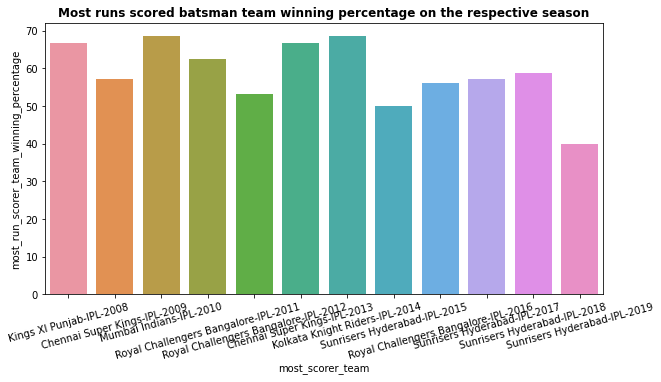

In [ ]:
# most run scorer team winning percentage throught each seasons and visualising through bar chart
import seaborn as sns
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=m_d_f, x="most_scorer_team", y="most_run_scorer_team_winning_percentage")
plt.title('Most runs scored batsman team winning percentage on the respective season',fontweight="bold")
plt.xticks(rotation=15)

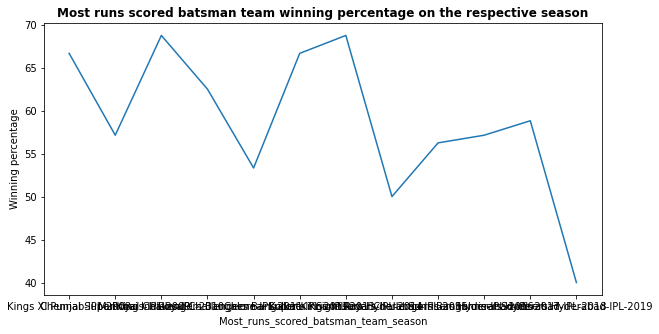

In [ ]:
# most run scorer team winning percentage throught each seasons and visualising through line chart
#plt.rcParams["figure.figsize"] = (40,10)
plt.plot(m_d_f["most_scorer_team"],m_d_f["most_run_scorer_team_winning_percentage"])
plt.title('Most runs scored batsman team winning percentage on the respective season',fontweight="bold")
plt.xlabel("Most_runs_scored_batsman_team_season")
plt.ylabel('Winning percentage')
plt.show()

In [ ]:
# most run scorer team winning percentage throught each seasons and visualising through bar chart
most_wickets_team=['Rajasthan Royals','Deccan Chargers','Deccan Chargers','Mumbai Indians','Delhi Daredevils','Chennai Super Kings','Chennai Super Kings','Chennai Super Kings','Sunrisers Hyderabad','Sunrisers Hyderabad','Kings XI Punjab','Chennai Super Kings']
most_wickets_team_winning_percentage=[]
for i,j in zip(most_wickets_team,l):
  most_wickets_team_winning_percentage.append(winning_percentage(j,i))
most_wickets_team_winning_percentage

[81.25,
 56.25,
 50.0,
 62.5,
 61.111111111111114,
 66.66666666666666,
 62.5,
 58.82352941176471,
 64.70588235294117,
 57.14285714285714,
 42.857142857142854,
 58.82352941176471]

In [ ]:
# most run scorer team winning percentage throught each seasons and visualising through bar chart
most_wickets_team_d=pd.DataFrame(['RR-IPL-2008','DC-IPL-2009','DC-IPL-2010','MI-IPL-2011','DD-IPL-2012','CSK-IPL-2013','CSK-IPL-2014','CSK-IPL-2015','SRH-IPL-2016','SRH-IPL-2017','KXIP-IPL-2018','CSK-IPL-2019'],columns=["most_wicket_taking_bowler_team"])
l_d=pd.DataFrame(l,columns=["ipl_season"])
most_wickets_team_winning_percentage_d=pd.DataFrame(most_wickets_team_winning_percentage,columns=["most_wickets_taker_team_winning_percentage"])
m_w_f=pd.concat([most_wickets_team_d,l_d,most_wickets_team_winning_percentage_d],axis=1)
m_w_f


,most_wicket_taking_bowler_team,ipl_season,most_wickets_taker_team_winning_percentage
0,RR-IPL-2008,IPL-2008,81.250000
1,DC-IPL-2009,IPL-2009,56.250000
2,DC-IPL-2010,IPL-2010,50.000000
3,MI-IPL-2011,IPL-2011,62.500000
4,DD-IPL-2012,IPL-2012,61.111111
5,CSK-IPL-2013,IPL-2013,66.666667
6,CSK-IPL-2014,IPL-2014,62.500000
7,CSK-IPL-2015,IPL-2015,58.823529
8,SRH-IPL-2016,IPL-2016,64.705882
9,SRH-IPL-2017,IPL-2017,57.142857


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

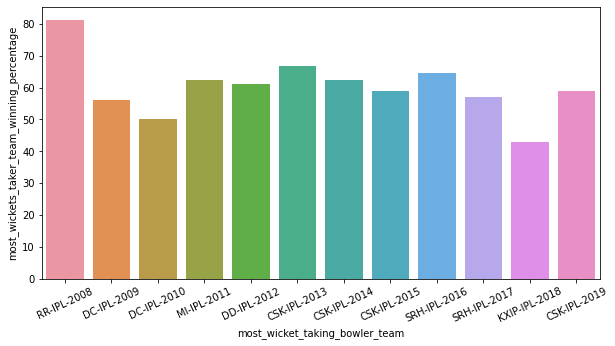

In [ ]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=m_w_f, x="most_wicket_taking_bowler_team", y="most_wickets_taker_team_winning_percentage")
plt.xticks(rotation=25)

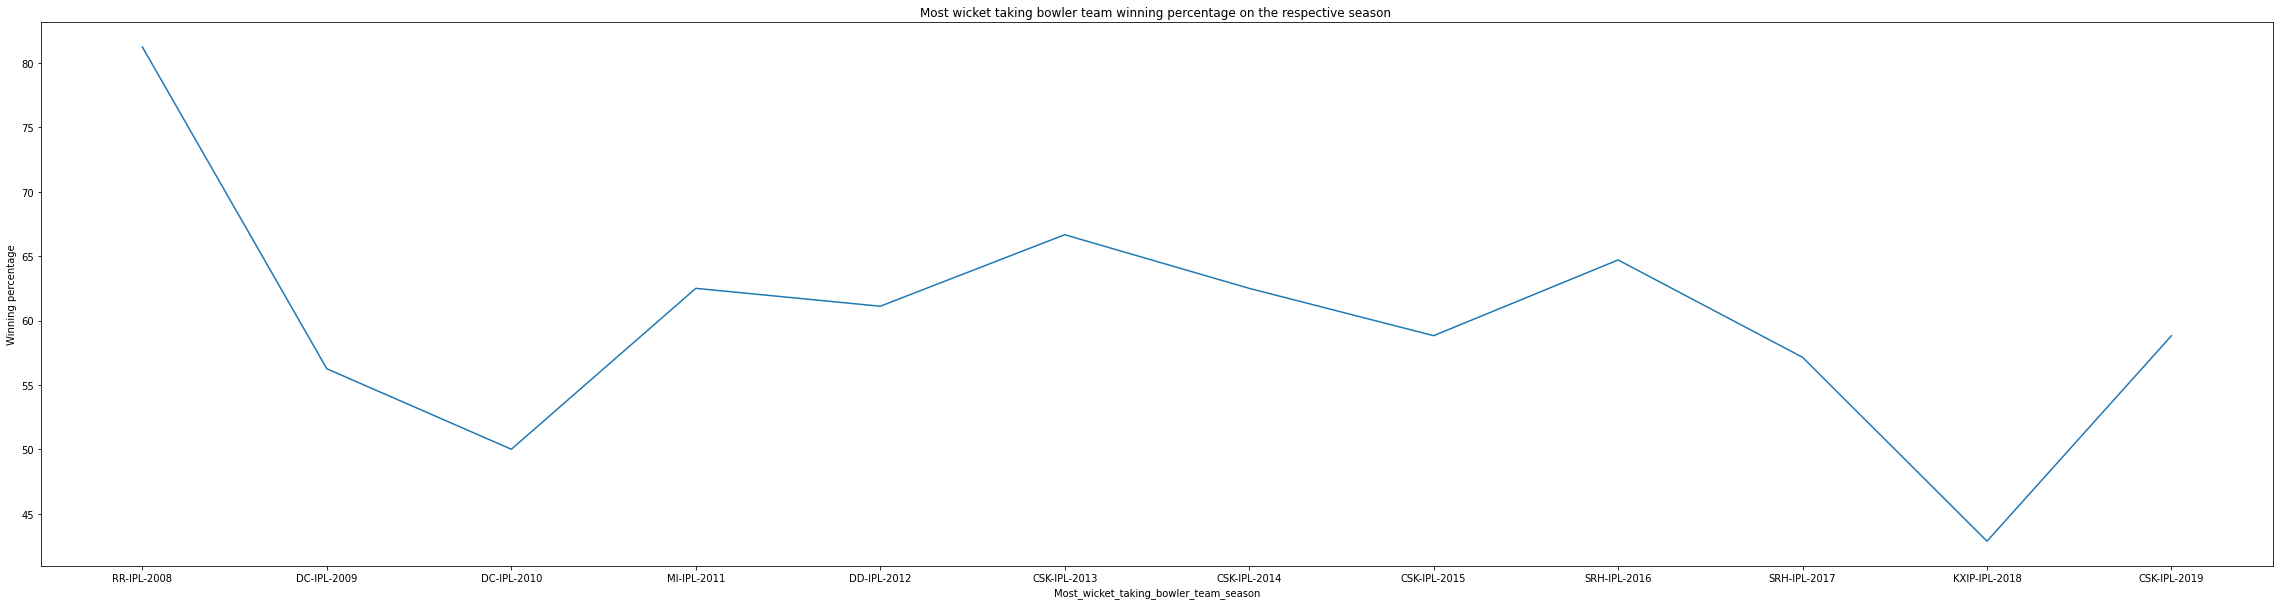

In [ ]:
plt.rcParams["figure.figsize"] = (40,10)
plt.plot(m_w_f["most_wicket_taking_bowler_team"],m_w_f["most_wickets_taker_team_winning_percentage"])
plt.title('Most wicket taking bowler team winning percentage on the respective season ')
plt.xlabel("Most_wicket_taking_bowler_team_season")
plt.ylabel('Winning percentage')
plt.show()

In [ ]:
df=pd.merge(m_w_f,m_d_f,on="ipl_season",how="inner")
df1=df[["most_wickets_taker_team_winning_percentage","most_run_scorer_team_winning_percentage","ipl_season"]]
df1.set_index("ipl_season",inplace=True)

Text(0.5, 1.0, 'Most wickets taking bowler team winning percentage VS most run scorer team winning percentage')

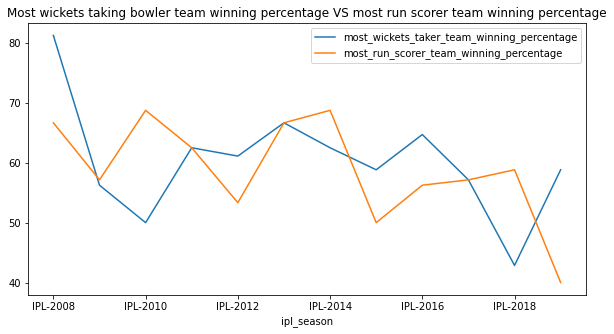

In [ ]:
df1.plot(figsize=(10,5))
plt.legend()
plt.title("Most wickets taking bowler team winning percentage VS most run scorer team winning percentage")


**Correlation between the boundaries and match winning over all the years**


In [ ]:
deliveries = pd.read_csv("/content/drive/MyDrive/Almabetter Data/IPL Data/deliveries.csv")
deliveries.set_index('match_id',inplace = True)

In [ ]:
deliveries['year'] = ''
for i in matches['id']:
  deliveries.loc[i,'year'] = matches[matches['id'] == i]['year'].iloc[0]
  


In [ ]:
# Creating a list of dataframes which contain data of different years. Each element containing the dataframe of a single year.
my_list = []
for i in deliveries.year.unique():
  my_list.append(deliveries[deliveries['year'] == i])

In [ ]:
# Creating a list of dataframes which contain data of different teams in different years. Each element containing the dataframe of a single year.
list_of_dataframes = []
for i in my_list:
  rand_Data = i[['batting_team','batsman_runs']]
  rand_Data = pd.DataFrame(rand_Data[rand_Data['batsman_runs'] >= 4].value_counts('batting_team',ascending = False))
  rand_Data.rename({0:'No. of boundaries '},axis = 1, inplace = True)
  list_of_dataframes.append(rand_Data)


In [ ]:
# Creating a dictionary which contain the years as keys, and within that another dictionary which has the count of victories of all teams.
dict_ = {}
for i in matches['date'].dt.year.unique():
  df = pd.DataFrame(matches[matches['date'].dt.year == i]['winner'].value_counts())
  dict_[i] = {}
  for k in df.index:
    if k not in list(dict_[i].keys()):
      dict_[i][k] = df.loc[k,'winner']

In [ ]:
no_of_times_won = pd.DataFrame(dict_).fillna(0)

In [ ]:
no_of_times_won

,2017,2008,2009,2010,2011,2012,2013,2014,2015,2016,2018,2019
Mumbai Indians,12.0,7.0,5.0,11.0,10.0,10.0,13.0,7.0,10.0,7.0,6.0,11.0
Rising Pune Supergiant,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kolkata Knight Riders,9.0,6.0,3.0,7.0,8.0,12.0,6.0,11.0,7.0,8.0,9.0,6.0
Sunrisers Hyderabad,8.0,0.0,0.0,0.0,0.0,0.0,10.0,6.0,7.0,11.0,10.0,6.0
Kings XI Punjab,7.0,10.0,7.0,4.0,7.0,8.0,8.0,12.0,3.0,4.0,6.0,6.0
Delhi Daredevils,6.0,7.0,10.0,7.0,4.0,11.0,3.0,2.0,5.0,7.0,5.0,0.0
Gujarat Lions,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0
Royal Challengers Bangalore,3.0,4.0,9.0,8.0,10.0,8.0,9.0,5.0,8.0,9.0,6.0,5.0
Rajasthan Royals,0.0,13.0,6.0,6.0,6.0,7.0,11.0,7.0,7.0,0.0,7.0,5.0
Chennai Super Kings,0.0,9.0,8.0,9.0,11.0,10.0,12.0,10.0,10.0,0.0,11.0,10.0


In [ ]:
# var = 0
# any_list = list(no_of_times_won.columns)
# for i in list_of_dataframes:
#   k = list(no_of_times_won.index.difference(i.index))
#   zzzz = no_of_times_won.drop(k)
#   list_of_dataframes[var] = pd.concat([list_of_dataframes[var] , zzzz[any_list[var]]], axis = 1)
#   var = var + 1

In [ ]:
# Finding the correlation no.of boundaries hit by a team with its no.of victories.
a = 0
corr_list = []
for i in no_of_times_won.columns:
  boun_vs_win = pd.concat([no_of_times_won[i],list_of_dataframes[a]],axis = 1).dropna()
  a = a + 1
  corr_list.append(boun_vs_win.corr().iloc[0,1])

In [ ]:
corr_list

[0.6888867001346102,
 0.6771792297603827,
 0.76988348521086,
 0.585890794274637,
 0.6871853347569103,
 0.6418614386265611,
 0.7267834687991997,
 0.8465560955182253,
 0.8982436218917766,
 0.7230825406934797,
 0.6944510170746169,
 0.6033902605784218]

In [ ]:
# Making a dictionary which maps year with its correlation
empty_dict = {}
a = 0
for i in no_of_times_won.columns:
  empty_dict[i] = corr_list[a]
  a = a + 1

In [ ]:
empty_dict

{2008: 0.6771792297603827,
 2009: 0.76988348521086,
 2010: 0.585890794274637,
 2011: 0.6871853347569103,
 2012: 0.6418614386265611,
 2013: 0.7267834687991997,
 2014: 0.8465560955182253,
 2015: 0.8982436218917766,
 2016: 0.7230825406934797,
 2017: 0.6888867001346102,
 2018: 0.6944510170746169,
 2019: 0.6033902605784218}

Text(0.5, 1.0, 'Correlation of the number of boundaries hit by the team with the number of matches it won')

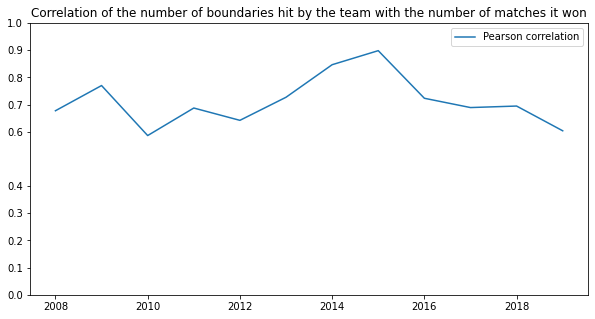

In [156]:
plt.rcParams["figure.figsize"] = (10,5)
pd.DataFrame([empty_dict]).T.rename({0:'Pearson correlation'}, axis = 1).sort_index().plot(kind='line')
plt.yticks([round(i,1) for i in np.linspace(0,1,10)]) # Correlation between the boundaries and match winning over all the years
plt.title("Correlation of the number of boundaries hit by the team with the number of matches it won")

**Correlation of overall run rates with the match winning of individual teams**
### Same process has been followed for the runrate.

In [ ]:
my_list[0].groupby('batting_team')['total_runs'].sum()

batting_team
Delhi Daredevils               2219
Gujarat Lions                  2412
Kings XI Punjab                2207
Kolkata Knight Riders          2484
Mumbai Indians                 2800
Rising Pune Supergiant         2470
Royal Challengers Bangalore    1845
Sunrisers Hyderabad            2349
Name: total_runs, dtype: int64

In [ ]:
emp_list = []
for i in my_list:
  x = pd.DataFrame(i[['batting_team']].reset_index().drop_duplicates().value_counts('batting_team')).rename({0:'matches_played'},axis = 1)
  y = pd.DataFrame(i.groupby('batting_team')['total_runs'].sum().rename({0:'runs_made'},axis = 1))
  emp_list.append(pd.concat([x,y],axis = 1))


In [ ]:
emp_list[0]

,matches_played,total_runs
Mumbai Indians,17,2800
Rising Pune Supergiant,16,2470
Kolkata Knight Riders,16,2484
Sunrisers Hyderabad,14,2349
Kings XI Punjab,14,2207
Gujarat Lions,14,2412
Delhi Daredevils,14,2219
Royal Challengers Bangalore,13,1845


In [ ]:
for i in range(len(emp_list)):
  emp_list[i]['runrate'] = emp_list[i]['total_runs']/(emp_list[i]['matches_played']*20)
  emp_list[i].drop(['matches_played','total_runs'],axis = 1,inplace = True)

In [ ]:
b = 0
co_list = []
for i in no_of_times_won.columns:
  runrate_vs_win = pd.concat([no_of_times_won[i],emp_list[b]],axis = 1).dropna()
  b = b + 1
  co_list.append(runrate_vs_win.corr().iloc[0,1])

In [ ]:
co_list

[0.22553379817627514,
 0.5509361985927862,
 0.4127795539764579,
 0.2958513389118272,
 0.41135138121692133,
 -0.14987393101527524,
 0.5699649055471903,
 0.8257982042815316,
 0.6245621609204144,
 0.405052704523155,
 0.32626420603554185,
 -0.27408458060958313]

In [ ]:
e_dict = {}
c = 0
for i in no_of_times_won.columns:
  e_dict[i] = co_list[c]
  c = c + 1

In [ ]:
e_dict

{2008: 0.5509361985927862,
 2009: 0.4127795539764579,
 2010: 0.2958513389118272,
 2011: 0.41135138121692133,
 2012: -0.14987393101527524,
 2013: 0.5699649055471903,
 2014: 0.8257982042815316,
 2015: 0.6245621609204144,
 2016: 0.405052704523155,
 2017: 0.22553379817627514,
 2018: 0.32626420603554185,
 2019: -0.27408458060958313}

Text(0.5, 1.0, 'Correlation of Avg runrate of the team with the number of matches it won')

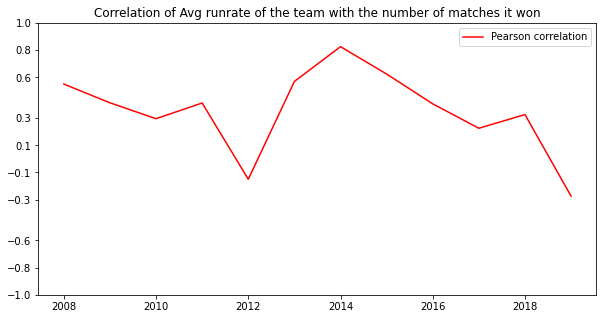

In [ ]:
pd.DataFrame([e_dict]).T.rename({0:'Pearson correlation'},axis = 1).sort_index().plot(kind = 'line',color = 'r',figsize=(10,5))
plt.yticks([round(i,1) for i in np.linspace(-1,1,10)])
plt.title("Correlation of Avg runrate of the team with the number of matches it won")